In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv


In [2]:
df=pd.read_csv('/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,9668.0,2008.341849,18.922482,1920.0,2007.0,2016.0,2019.0,2021.0


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
listed_in_counts=df['listed_in'].value_counts()
listed_in_counts

listed_in
Drama                                                                            986
Comedy                                                                           536
Drama, Suspense                                                                  399
Comedy, Drama                                                                    377
Animation, Kids                                                                  356
                                                                                ... 
Arts, Entertainment, and Culture, Music Videos and Concerts, Special Interest      1
Arts, Entertainment, and Culture, Comedy, Military and War                         1
Comedy, Faith and Spirituality, Kids                                               1
Arts, Entertainment, and Culture, Fantasy, Kids                                    1
Anime, Comedy, Drama                                                               1
Name: count, Length: 518, dtype: int64

<Axes: title={'center': 'Distribution of Content Type'}, xlabel='type'>

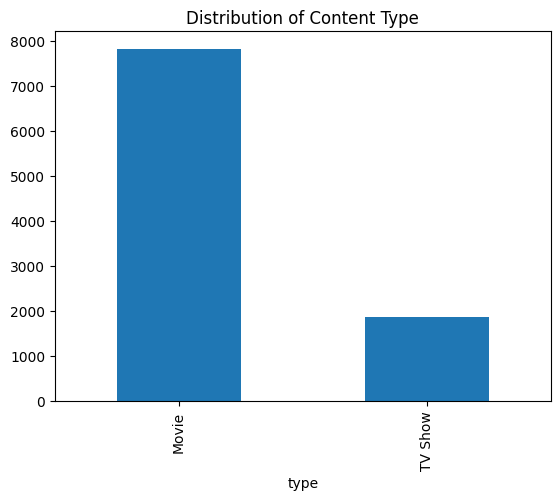

In [8]:
df['type'].value_counts().plot(kind='bar', title='Distribution of Content Type')

<Axes: title={'center': 'Top 10 Directors by Content Count'}, ylabel='director'>

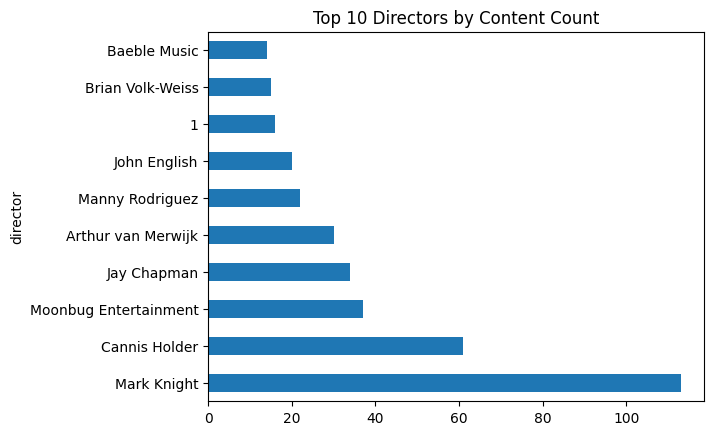

In [9]:
df['director'].value_counts().head(10).plot(kind='barh', title='Top 10 Directors by Content Count')

<Axes: title={'center': 'Top 10 Countries by Content Count'}, ylabel='country'>

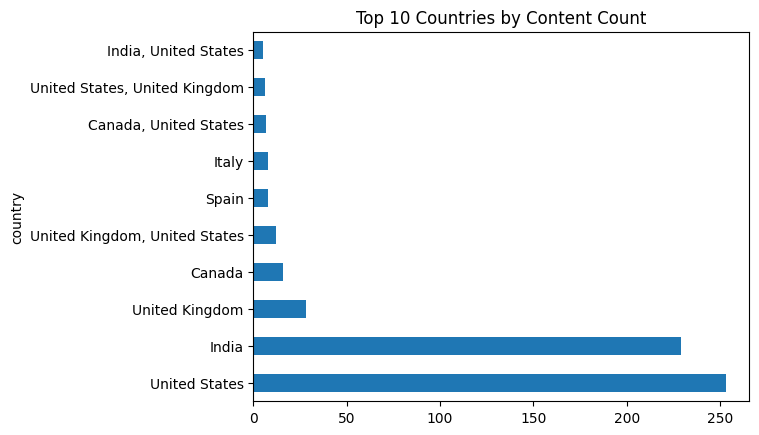

In [10]:
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries by Content Count')

In [11]:
# Fill missing values by reassigning
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<Figure size 1000x600 with 0 Axes>

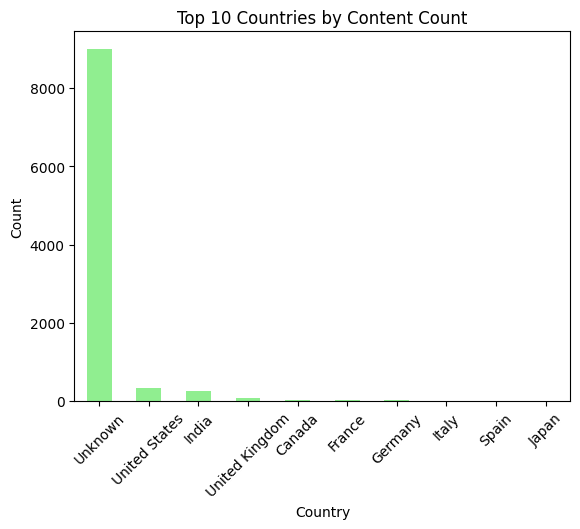

In [13]:
# Split the 'country' column by commas and count each country's occurrences
country_split = df['country'].dropna().apply(lambda x: x.split(', '))
country_counts = Counter(chain(*country_split)).most_common(10)

# Convert to DataFrame for plotting
country_df = pd.DataFrame(country_counts, columns=['Country', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
country_df.set_index('Country').plot(kind='bar', color='lightgreen', legend=False)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

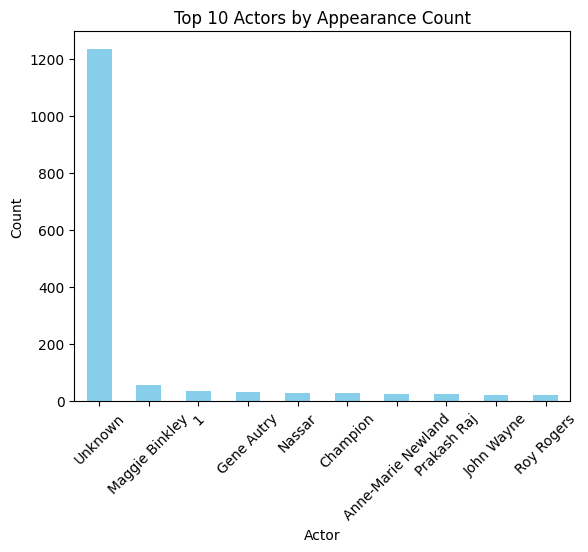

In [14]:
cast_split = df['cast'].dropna().apply(lambda x: x.split(', '))  # Split by comma and remove NaN
cast_counts = Counter(chain(*cast_split)).most_common(10)  # Flatten and count

# Convert to DataFrame for easier plotting
cast_df = pd.DataFrame(cast_counts, columns=['Actor', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
cast_df.set_index('Actor').plot(kind='bar', color='skyblue', legend=False)
plt.title('Top 10 Actors by Appearance Count')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

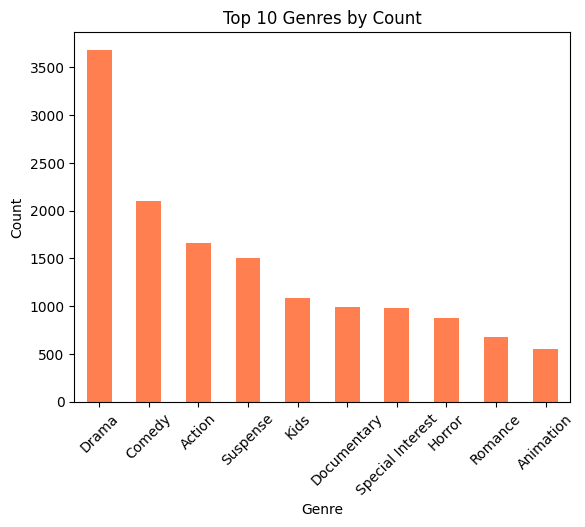

In [15]:
# Split the 'listed_in' column by commas and count each genre
genre_split = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter(chain(*genre_split)).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
genre_df.set_index('Genre').plot(kind='bar', color='coral', legend=False)
plt.title('Top 10 Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<Axes: title={'center': 'Content Released Over the Years'}, xlabel='release_year'>

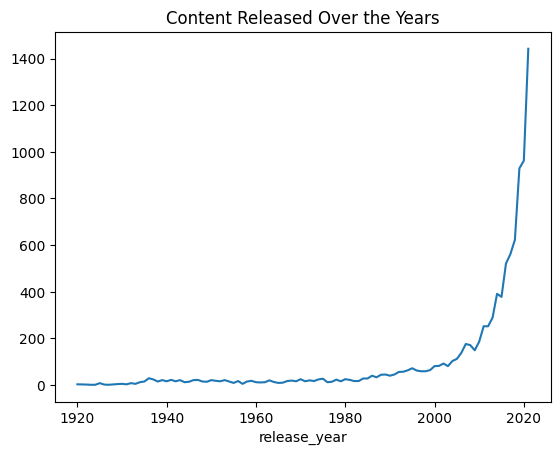

In [16]:
df['release_year'].value_counts().sort_index().plot(kind='line', title='Content Released Over the Years')

<Axes: title={'center': 'Distribution of Ratings'}, ylabel='count'>

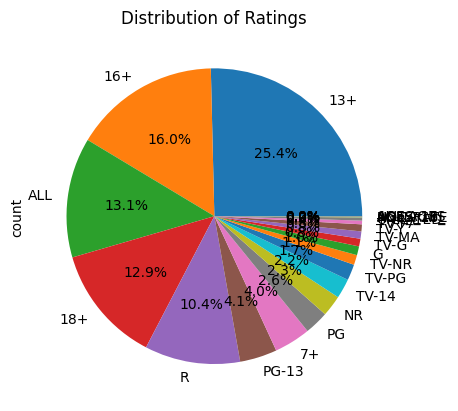

In [17]:
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Ratings')